In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [100]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [101]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadGen.csv", encoding='utf-8-sig',parse_dates=['Web_Date','SubYearMonth'])
LeadScore_df

,AnnualRevenue,Lead_Capture_Date,LEAD_ID,Lead_Score,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted,SubYearMonth
0,NaN,4/13/2021,00Q6g000009KjKzEAK,3,0064u0000137kcFAAQ,NaN,NaN,5192.0,Direct,NaN,NaT,NaN,NaN,NaN,0,1,2020-08-01
1,125000.0,3/31/2021,00Q4u00001e3m3GEAQ,21,0064u000013rQR3AAM,30000.0,4.0,1101.0,Lending Tree,NaN,2021-03-31,NaN,$100k-$200k,NaN,1,1,2020-12-01
2,0.0,4/28/2021,00Q4u00001e2m7kEAA,18,0064u000013rghBAAQ,NaN,4.0,5061.0,Direct,"$25,000 to $50,000",2021-04-28,NaN,$100k-$200k,6 Months to 1 Year,0,1,2021-04-01
3,525000.0,1/4/2021,00Q4u00001d7TSaEAM,8,0064u000013sNViAAM,250000.0,NaN,1257.0,Strategic Partners,NaN,NaT,NaN,$500k-$1mm,NaN,0,1,2021-01-01
4,25598.0,1/2/2021,00Q4u00001cYD9pEAG,14,0064u000013sNY2AAM,NaN,3.0,5192.0,Direct,"$25,000 to $50,000",2021-01-02,NaN,$500k-$1mm,Greater than 3 Years,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74998,NaN,8/31/2021,00Q4u00001gRDQmEAO,3,0064u000017TjiGAAS,0.0,NaN,5061.0,Direct,NaN,NaT,NaN,NaN,NaN,0,0,NaT
74999,NaN,8/30/2021,00Q4u00001gR9qsEAC,11,0064u000017TjiVAAS,NaN,2.0,5061.0,Direct,"$10,000 to $25,000",2021-08-30,NaN,"Less than $100,000",1 to 3 Years,0,0,NaT
75000,NaN,8/31/2021,00Q4u00001gRjs8EAC,3,0064u000017TjjJAAS,0.0,NaN,5061.0,Direct,NaN,NaT,NaN,NaN,NaN,0,0,NaT
75001,NaN,8/30/2021,00Q4u00001gxUKHEA2,24,0064u000017TjjdAAC,NaN,4.0,1119.0,Digital - Affiliate,"$10,000 to $25,000",2021-08-30,NaN,$100k-$200k,Greater than 3 Years,0,0,NaT


In [102]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75003 entries, 0 to 75002
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AnnualRevenue           52372 non-null  float64       
 1   Lead_Capture_Date       75003 non-null  object        
 2   LEAD_ID                 75003 non-null  object        
 3   Lead_Score              75003 non-null  int64         
 4   OPPORTUNITY_ID          75003 non-null  object        
 5   Requested_Amount        36190 non-null  float64       
 6   Self_Graded_Credit      65817 non-null  float64       
 7   Web_Ad_Outlet           73932 non-null  float64       
 8   Web_Ad_Outlet_Source    74583 non-null  object        
 9   Web_Amount_to_Borrow    33273 non-null  object        
 10  Web_Date                52155 non-null  datetime64[ns]
 11  Web_Form_Name           0 non-null      float64       
 12  Web_Gross_Annual_Sales  60384 non-null  object

In [103]:
LeadScore_df['Web_Amount_to_Borrow'] = LeadScore_df['Web_Amount_to_Borrow'].str.replace(',','')

In [104]:
LeadScore_df['Requested_Amount'].fillna(LeadScore_df['Web_Amount_to_Borrow'], inplace = True)

LeadScore_df['AnnualRevenue'].fillna(LeadScore_df['Web_Gross_Annual_Sales'], inplace = True)

In [105]:
LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [106]:
LeadScore_df = LeadScore_df.drop(['Web_Form_Name', 'Web_Date','SubYearMonth','OPPORTUNITY_ID','LEAD_ID','Lead_Capture_Date' ], axis=1)
LeadScore_df.head()

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted
0,NaN,3,NaN,NaN,5192.0,Direct,NaN,NaN,NaN,0,1
1,125000.0,21,NaN,4.0,1101.0,Lending Tree,NaN,$100k-$200k,NaN,1,1
2,0.0,18,$25000 to $50000,4.0,5061.0,Direct,$25000 to $50000,$100k-$200k,6 Months to 1 Year,0,1
3,525000.0,8,NaN,NaN,1257.0,Strategic Partners,NaN,$500k-$1mm,NaN,0,1
4,25598.0,14,$25000 to $50000,3.0,5192.0,Direct,$25000 to $50000,$500k-$1mm,Greater than 3 Years,0,0


In [107]:
LeadScore_df = LeadScore_df.dropna()
LeadScore_df

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted
2,0.0,18,$25000 to $50000,4.0,5061.0,Direct,$25000 to $50000,$100k-$200k,6 Months to 1 Year,0,1
4,25598.0,14,$25000 to $50000,3.0,5192.0,Direct,$25000 to $50000,$500k-$1mm,Greater than 3 Years,0,0
8,"Less than $100,000",14,$5000 to $10000,4.0,1226.0,Strategic Partners,$5000 to $10000,"Less than $100,000",Greater than 3 Years,0,1
9,$500k-$1mm,10,250000.00,1.0,1085.0,Digital-PPC,250000.00,$500k-$1mm,3 years or more,0,0
10,$100k-$200k,15,$5000 to $10000,4.0,1226.0,Strategic Partners,$5000 to $10000,$100k-$200k,1 to 3 Years,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74996,$1mm+,24,$10000 to $25000,3.0,1119.0,Digital - Affiliate,$10000 to $25000,$1mm+,Greater than 3 Years,0,0
74997,"Less than $100,000",14,$25000 to $50000,3.0,1000.0,Digital-Organic,$25000 to $50000,"Less than $100,000",1 to 3 Years,0,0
74999,"Less than $100,000",11,$10000 to $25000,2.0,5061.0,Direct,$10000 to $25000,"Less than $100,000",1 to 3 Years,0,0
75001,$100k-$200k,24,$10000 to $25000,4.0,1119.0,Digital - Affiliate,$10000 to $25000,$100k-$200k,Greater than 3 Years,0,0


In [108]:
#Outlet ource Label
#1000= General-Organic , #1001= Google-Organic, #1002= Bing-Organic, #1003= Yahoo-Organic, #1004= LinkedIn-Organic,
#1010=Google-Non-Branded, #1011=Google-Branded, #1070= Facebook-Facebook, #1085= RateKick-Ratekick, #1101=LendingTree, 
#1118= TrafficPoint-General, #1119=BusinessLoans.com, #1241=Fleetcor, #1257=Fundera, #1280= Fundera, #1240=Fleetcor, 
#5000=DirectMail, #5018=DirectMail, #5021=D&B-ALC, #5037=DirectMail, #1226=Fundera, #5028=Epsilon, #5051=Direct Mail, 
#5081=Accutrend- ALC, #5190=DirectMail-Merit, #5053=DirectMail-Small Bussinesss, #5055=DirectMail-Epsilon on BalanceSheet,
#5061=Marketforce-ALC, #5071=Crosslists-ALC& New Bus, #5192=DirectMail-Merit 

In [109]:
from sklearn.preprocessing import LabelEncoder

Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Web_Amount_to_Borrow'].replace(Borrow_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
LeadScore_df['Web_Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

LeadScore_df['AnnualRevenue'].replace(Revenue_dict, inplace=True)

Source_dict = {1000:0, 1001:1, 1002:2, 1003:3, 1004:4, 1010:5, 1011:6, 1070:7, 1085:8, 1101:9, 1118:10,
              1119:11, 1241:12, 1243: 13, 1257:14, 1280:15, 1240:16, 5000:17, 5018:18, 5020:19, 5021:20, 5037:21, 1226:22,
              5028:23, 5051:24, 5081:25, 5190:26, 5053:27, 5055:28,5061:29, 5071:30, 5191:31, 5192:32}

LeadScore_df['Web_Ad_Outlet'].replace(Source_dict, inplace=True)

Business_dict = {'0-6 Months':0,'1 to 3 Years':1, '1-3 years':2, '3 years or more':3, '6 Months to 1 Year':4, 'Greater than 3 Years':5,'6-12 Months':6, 'Less than 6 Months':7}
LeadScore_df['Web_Time_in_Business'].replace(Business_dict, inplace=True)

LeadScore_df.sample(10)

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted
73597,350000.0,19,37500.0,4.0,25.0,Direct,37500.0,350000.0,1,0,0
22565,150000.0,8,75000.00,1.0,5.0,Digital-PPC,75000.00,150000.0,5,0,0
12451,35000.0,14,37500.0,3.0,17.0,Direct,37500.0,35000.0,5,0,0
71487,35000.0,8,25000.00,1.0,6.0,Digital-PPC,25000.00,35000.0,5,0,1
41510,35000.0,17,5000.00,4.0,7.0,Digital-PPC,5000.00,35000.0,7,0,0
7279,0.0,14,37500.0,3.0,32.0,Direct,37500.0,35000.0,1,0,0
34861,350000.0,9,75000.00,1.0,6.0,Digital-PPC,75000.00,350000.0,5,0,0
39629,0.0,15,37500.0,3.0,29.0,Direct,37500.0,150000.0,1,0,0
11988,35000.0,17,25000.00,4.0,6.0,Digital-PPC,25000.00,35000.0,5,0,0
38864,0.0,14,37500.0,3.0,29.0,Direct,37500.0,35000.0,1,0,0


In [110]:
LeadScore_df.dtypes

AnnualRevenue             float64
Lead_Score                  int64
Requested_Amount           object
Self_Graded_Credit        float64
Web_Ad_Outlet             float64
Web_Ad_Outlet_Source       object
Web_Amount_to_Borrow       object
Web_Gross_Annual_Sales    float64
Web_Time_in_Business        int64
Is_Funded                   int64
Is_Submitted                int64
dtype: object

In [111]:
LeadScore_df["Requested_Amount"]= pd.to_numeric(LeadScore_df["Requested_Amount"], downcast="float")
LeadScore_df["Web_Amount_to_Borrow"]= pd.to_numeric(LeadScore_df["Web_Amount_to_Borrow"], downcast="float")
LeadScore_df["AnnualRevenue"]= pd.to_numeric(LeadScore_df["AnnualRevenue"], downcast="float")
LeadScore_df["Web_Gross_Annual_Sales"]= pd.to_numeric(LeadScore_df["Web_Gross_Annual_Sales"], downcast="float")
LeadScore_df["Web_Time_in_Business"]= pd.to_numeric(LeadScore_df["Web_Time_in_Business"], downcast="float")

LeadScore_df.head()                                                 

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted
2,0.0,18,37500.0,4.0,29.0,Direct,37500.0,150000.0,4.0,0,1
4,25598.0,14,37500.0,3.0,32.0,Direct,37500.0,750000.0,5.0,0,0
8,35000.0,14,7500.0,4.0,22.0,Strategic Partners,7500.0,35000.0,5.0,0,1
9,750000.0,10,250000.0,1.0,8.0,Digital-PPC,250000.0,750000.0,3.0,0,0
10,150000.0,15,7500.0,4.0,22.0,Strategic Partners,7500.0,150000.0,1.0,0,0


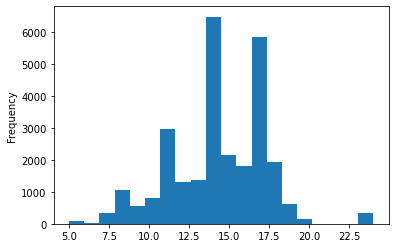

In [112]:
ax = LeadScore_df['Lead_Score'].plot.hist(bins=20)

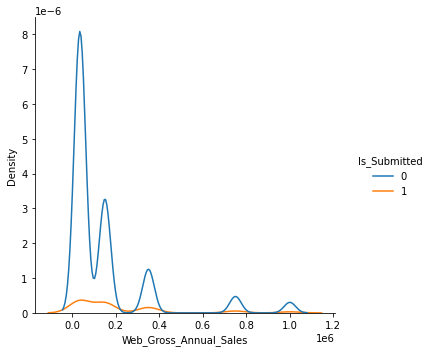

In [113]:
sns.displot(data=LeadScore_df, x="Web_Gross_Annual_Sales", hue="Is_Submitted", kind="kde")

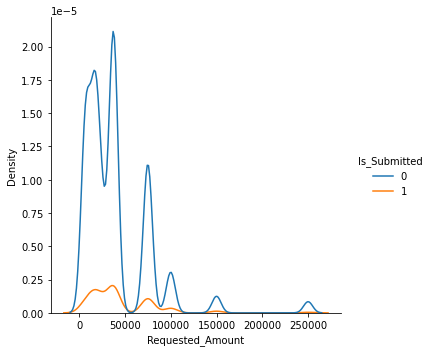

In [114]:
sns.displot(data=LeadScore_df, x="Requested_Amount", hue="Is_Submitted", kind="kde")

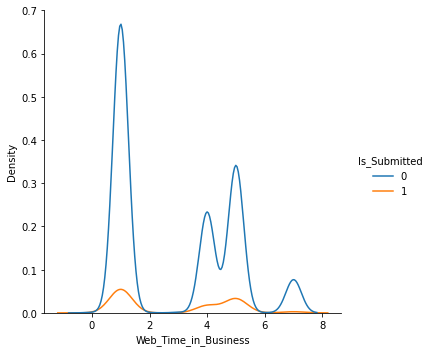

In [115]:
sns.displot(data=LeadScore_df, x="Web_Time_in_Business", hue="Is_Submitted", kind="kde")

In [116]:
Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Web_Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [117]:
LeadScore_df["Web_Ad_Outlet_Source"]= pd.to_numeric(LeadScore_df["Web_Ad_Outlet_Source"], downcast="float")

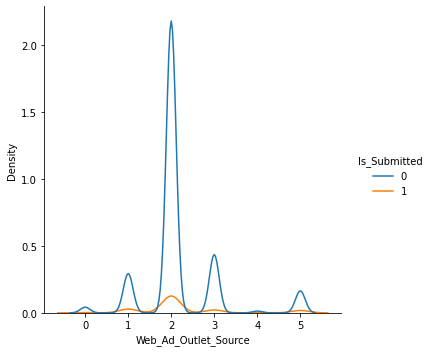

In [118]:
sns.displot(data=LeadScore_df, x="Web_Ad_Outlet_Source", hue="Is_Submitted", kind="kde")

In [119]:
LeadScore_df.drop(['Is_Funded','Web_Amount_to_Borrow','AnnualRevenue','Lead_Score'], axis =1, inplace=True)
LeadScore_df.head()

,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Submitted
2,37500.0,4.0,29.0,2.0,150000.0,4.0,1
4,37500.0,3.0,32.0,2.0,750000.0,5.0,0
8,7500.0,4.0,22.0,5.0,35000.0,5.0,1
9,250000.0,1.0,8.0,3.0,750000.0,3.0,0
10,7500.0,4.0,22.0,5.0,150000.0,1.0,0


In [120]:
X = np.array(LeadScore_df)

In [121]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

In [122]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)

In [123]:
from sklearn.preprocessing import StandardScaler
standar_scaler=StandardScaler()
scaled_X = standar_scaler.fit_transform(X)

In [124]:
LeadScore_df= LeadScore_df.sample(frac=1, replace=False)

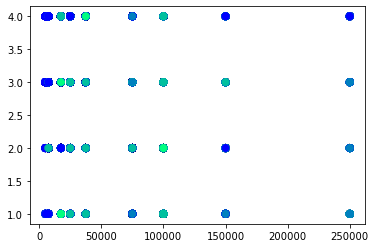

In [125]:
from sklearn.cluster import KMeans 

# Initialize the model
kmeans_model = KMeans(n_clusters=5, random_state=0) 
# Fit (train) the model
kmeans_model.fit(X)                            # Notice the we just have X in fitting model
# Predict the labels for observations
y_kmeans = kmeans_model.predict(X)             # Use the same X for prediction
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter');

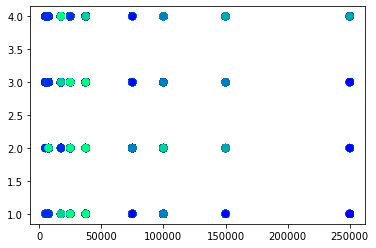

In [126]:
# Initialize the model
kmeans_model = KMeans(n_clusters=7, random_state=0) 
# Fit (train) the model
kmeans_model.fit(X)                            # Notice the we just have X in fitting model
# Predict the labels for observations
y_kmeans = kmeans_model.predict(X)             # Use the same X for prediction
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter');

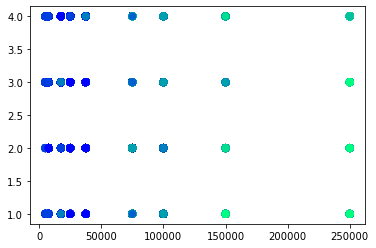

In [127]:
# Initialize the model
kmeans_model = KMeans(n_clusters=9, random_state=0) 
# Fit (train) the model
kmeans_model.fit(X)                            # Notice the we just have X in fitting model
# Predict the labels for observations
y_kmeans = kmeans_model.predict(X)             # Use the same X for prediction
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter');

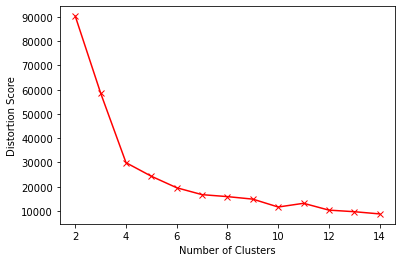

In [128]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
n_clusters = range(2,15)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [129]:
n_clusters = range(2,15)
for k in n_clusters:
    # Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X)
    y_kmeans = kmeans_model.predict(X)
    
    silhouette_avg = silhouette_score(X, y_kmeans)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8339177628648665
For n_clusters = 3 The average silhouette_score is : 0.7459732936322221
For n_clusters = 4 The average silhouette_score is : 0.7655496200785187
For n_clusters = 5 The average silhouette_score is : 0.7721101018656452
For n_clusters = 6 The average silhouette_score is : 0.7695099360553184
For n_clusters = 7 The average silhouette_score is : 0.7744606694932945
For n_clusters = 8 The average silhouette_score is : 0.7730082053860093
For n_clusters = 9 The average silhouette_score is : 0.7749678252581466
For n_clusters = 10 The average silhouette_score is : 0.76245946906913
For n_clusters = 11 The average silhouette_score is : 0.7716335761619504
For n_clusters = 12 The average silhouette_score is : 0.7551643237826576
For n_clusters = 13 The average silhouette_score is : 0.7604009327516493
For n_clusters = 14 The average silhouette_score is : 0.765638206353907


In [130]:
kmeans_model = KMeans(n_clusters=11, random_state=0) 
y_kmeans = kmeans_model.fit_predict(X)

print(y_kmeans)

[6 4 0 ... 0 6 6]


In [131]:
centers = kmeans_model.cluster_centers_
centers

array([[2.11012488e+04, 3.34574893e+00, 2.50932985e+01, 2.19509185e+00,
        3.50000000e+04, 2.78690191e+00, 7.26784288e-02],
       [7.36360239e+04, 2.55605381e+00, 4.91405082e+01, 1.99252616e+00,
        1.00000000e+06, 3.46935725e+00, 1.59940209e-01],
       [2.92846386e+04, 2.95240964e+00, 4.09668675e+01, 2.19819277e+00,
        3.50000000e+05, 3.01686747e+00, 1.91566265e-01],
       [8.58414239e+04, 2.72977346e+00, 2.35350593e+01, 2.25943905e+00,
        1.50000000e+05, 2.95846818e+00, 1.35382956e-01],
       [5.39635417e+04, 2.70833333e+00, 4.37354167e+01, 2.07500000e+00,
        7.50000000e+05, 3.31145833e+00, 1.82291667e-01],
       [8.34156290e+04, 3.00515243e+00, 2.08896522e+01, 2.36968656e+00,
        3.50000000e+04, 3.21811936e+00, 7.38514384e-02],
       [2.67087805e+04, 3.09853659e+00, 3.31086829e+01, 2.06321951e+00,
        1.50000000e+05, 2.74673171e+00, 1.37365854e-01],
       [2.50000000e+05, 2.32183908e+00, 5.35632184e+00, 2.66666667e+00,
        3.50000000e+05, 3

In [ ]:
Requested_Amount	Self_Graded_Credit	Web_Ad_Outlet	Web_Ad_Outlet_Source	Web_Gross_Annual_Sales	Web_Time_in_Business	Is_Submitted

In [140]:
for i in range(0,11):
    filter_cluster = (y_kmeans == i)
    sub_data = LeadScore_df[filter_cluster]
    print("Cluster {} :  mean_Requested_Amount={}, mean_Self_Graded_Credit = {},mean_Web_Ad_Outlet={}, mean_Web_Ad_Outlet_Source={},  mean_Web_Gross_Annual_Sales = {} , mean_Web_Time_in_Business = {}, median_Is_Submitted={}".format(
        i, np.round(sub_data.Requested_Amount.mean(),2),
        np.round(sub_data.Self_Graded_Credit.mean()),
        np.round(sub_data.Web_Ad_Outlet.mean()),
        np.round(sub_data.Web_Ad_Outlet_Source.mean()),
        np.round(sub_data.Web_Gross_Annual_Sales.mean(),2),
        np.round(sub_data.Web_Time_in_Business.mean()),
        np.round(sub_data.Is_Submitted.median())))

Cluster 0 :  mean_Requested_Amount=39577.05, mean_Self_Graded_Credit = 3.0,mean_Web_Ad_Outlet=29.0, mean_Web_Ad_Outlet_Source=2.0,  mean_Web_Gross_Annual_Sales = 146459.52 , mean_Web_Time_in_Business = 3.0, median_Is_Submitted=0.0
Cluster 1 :  mean_Requested_Amount=38441.7, mean_Self_Graded_Credit = 3.0,mean_Web_Ad_Outlet=28.0, mean_Web_Ad_Outlet_Source=2.0,  mean_Web_Gross_Annual_Sales = 148632.28 , mean_Web_Time_in_Business = 3.0, median_Is_Submitted=0.0
Cluster 2 :  mean_Requested_Amount=41521.12, mean_Self_Graded_Credit = 3.0,mean_Web_Ad_Outlet=22.0, mean_Web_Ad_Outlet_Source=2.0,  mean_Web_Gross_Annual_Sales = 155603.47 , mean_Web_Time_in_Business = 3.0, median_Is_Submitted=0.0
Cluster 3 :  mean_Requested_Amount=40357.52, mean_Self_Graded_Credit = 3.0,mean_Web_Ad_Outlet=33.0, mean_Web_Ad_Outlet_Source=2.0,  mean_Web_Gross_Annual_Sales = 137169.12 , mean_Web_Time_in_Business = 3.0, median_Is_Submitted=0.0
Cluster 4 :  mean_Requested_Amount=40778.64, mean_Self_Graded_Credit = 3.0,me